twilio chatbot text sentiment analysis - monkeylearn / IBM watson tone ananlysis

Data File from decd.co/tweets-apple

In [1]:
# For data and matrix manipulation
import pandas as pd
import numpy as np

# For visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# For string manipulation
import re  # regular expression - searching for patters eg '!!!'
import string

# For text pre-processing - comprehensive package for all NLP
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob

# For extracting features -- i.e. the document-term matrix
from sklearn.feature_extraction.text import CountVectorizer


# Necessary dependencies from NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /Users/Guest/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /Users/Guest/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/Guest/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
data = pd.read_csv('apple-tweets.csv')

In [3]:
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,5746452.0,1.090000e+18,1548799817,waltmossberg,It’s true that @Apple likely overpriced the la...,Twitter for iPad,279,NaN,NaN,NaN,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
1,5746452.0,1.090000e+18,1548800328,waltmossberg,@AaronSuplizio @Apple Yes it is.,Twitter for iPad,10,1.090000e+18,2.365419e+07,AaronSuplizio,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
2,5746452.0,1.090000e+18,1548802301,waltmossberg,"@mvigod @Apple As I have said many times here,...",Twitter for iPad,259,1.090000e+18,2.224800e+08,mvigod,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
3,5746452.0,1.090000e+18,1548800242,waltmossberg,I’m not saying that @Apple doesn’t have proble...,Twitter for iPad,270,1.090000e+18,5.746452e+06,waltmossberg,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
4,1175221.0,1.090000e+18,1548737368,digiphile,@DaveLeeBBC @Apple @NYGovCuomo Nor I; saw it g...,Twitter for iPhone,88,1.090000e+18,1.251786e+09,DaveLeeBBC,...,165604,108196,1173899540,True,https://t.co/QWOxhaw2kk,https://digiphile.info/about/,en,https://pbs.twimg.com/profile_banners/1175221/...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/1076306605...


In [6]:
tweets = data['text']

In [7]:
tweets

0       It’s true that @Apple likely overpriced the la...
1                        @AaronSuplizio @Apple Yes it is.
2       @mvigod @Apple As I have said many times here,...
3       I’m not saying that @Apple doesn’t have proble...
4       @DaveLeeBBC @Apple @NYGovCuomo Nor I; saw it g...
5       So: @Apple has now disabled Group #Facetime ht...
6       I wish @tim_cook &amp; @apple tweeted the stat...
7       Any word on a time to fix, @tim_cook &amp; @ap...
8       @DaveLeeBBC @Apple @NYGovCuomo I used to be on...
9       3/ @Apple is biggest welfare taker of all time...
10      1/ Eye-popping profits on @Apple services -- 6...
11      @HollisMulwrayV @Apple @irs Gross. Net is 35-3...
12      2/ @Apple’s outrageous gross profit margins, r...
13      On March 6th, 1998, there was a #NewtonProtest...
14      @aallan @Apple At least on iOS, there are rule...
15      Come on @Apple @AppleSupport there’s no need t...
16      Hey @Apple why does my iPhone like to autocorr...
17      @twiz7

'bag of words' model transforms text into count of words matrix - counts capitals/spelling as differnt terms

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

### Data Preprocessing


In [32]:
example = 'This is the a pre-  processing   stage #applE. @apple #whataday THis is better than amazing. That is all I have to say. #winning 1999 '

In [25]:
word_tokenize(example) # takes every word as a individual token

['This',
 'is',
 'the',
 'a',
 'pre-',
 'processing',
 'stage',
 '#',
 'applE',
 '.',
 '@',
 'apple',
 '#',
 'whataday',
 'THis',
 'is',
 '.',
 'That',
 'is',
 'all',
 'I',
 'have',
 'to',
 'say',
 '.',
 '1999']

In [26]:
sent_tokenize(example) # Looks for full stops to split text.

['This is the a pre-  processing   stage #applE.',
 '@apple #whataday THis   is.',
 'That is all I have to say.',
 '1999']

In [14]:
example.lower() # Makes everything lower case

'this is the a pre-  processing stage #apple. #whataday this is. that is all i have to say '

In [16]:
re.sub('@','@@', example) # replaces a pattern with something else (1at with 2at)

'This is the a pre-  processing stage #applE. @@apple #whataday THis is. That is all I have to say '

In [17]:
re.sub('\s+',' ', example) # takes all spaces greater than 1space and replaces with 1space

'This is the a pre- processing stage #applE. @apple #whataday THis is. That is all I have to say '

regex python module re has range of shortcuts 
https://www.w3schools.com/python/python_regex.asp

build function that can apply to dataframe - sample_text is a sub-variable in function

In [18]:
def clean_text(sample_text):
    
    sample_text = re.sub(r'[#|@|-|?|!]',r' ',sample_text) #get rid of these charachters
    
    sample_text = sample_text.strip(' ') #remove bigger spaces
    
    sample_text = sample_text.lower() # change to lowercase 
    
    sample_text = WordNetLemmatizer().lemmatize(sample_text) # reduce word to base word (eg-ing)
    
    words = word_tokenize(sample_text)
    
    words = [w for w in words if w not in stopwords.words('english')] #remove stop words (see below)
        
    text = ' '.join(words)
    
    return text

Stop Words - In natural language processing, useless words (data), are referred to as stop words. Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In many languages, words appear in several inflected forms. For example, in English, the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word. The association of the base form with a part of speech is often called a lexeme of the word.

In [33]:
clean_text(example)

'pre- processing stage apple . apple whataday better amazing . say . winning 1999'

In [34]:
#instead of for i loop use .apply to itterate though dataset - runs at the same time instead of iteration

In [36]:
tweets = tweets.apply(lambda x: clean_text(x))

In [37]:
tweets

0       ’ true apple likely overpriced latest iphones ...
1                               aaronsuplizio apple yes .
2       mvigod apple said many times , regard multiple...
3       ’ saying apple ’ problems challenges . . ’ say...
4       daveleebbc apple nygovcuomo ; saw go tracked c...
5       : apple disabled group facetime https : //t.co...
6       wish tim_cook & amp ; apple tweeted statement ...
7       word time fix , tim_cook & amp ; apple https :...
8       daveleebbc apple nygovcuomo used , back wanted...
9       3/ apple biggest welfare taker time $ 120 bill...
10      1/ eye-popping profits apple services -- 63-ce...
11      hollismulwrayv apple irs gross . net 35-39 % r...
12      2/ apple ’ outrageous gross profit margins , r...
13      march 6th , 1998 , newtonprotest apple hq prot...
14      aallan apple least ios , rules , regulations e...
15      come apple applesupport ’ need call someone “ ...
16      hey apple iphone like autocorrect thanos thank...
17      twiz71

In [38]:
#count vectorisor

In [48]:
vec = CountVectorizer(max_features= 10000, min_df=0.01, ngram_range=(1,1))

bag_of_words = vec.fit_transform(tweets)

bag_of_words

<9991x148 sparse matrix of type '<class 'numpy.int64'>'
	with 46204 stored elements in Compressed Sparse Row format>

In [44]:
vec.vocabulary_  #column name ; Column Count looks at all words in dataset


{'true': 18261,
 'apple': 1856,
 'likely': 10683,
 'overpriced': 13140,
 'latest': 10461,
 'iphones': 9392,
 'mature': 11376,
 'market': 11279,
 'especially': 6273,
 'china': 3819,
 'therefore': 17783,
 'overestimated': 13122,
 'revenues': 15151,
 'earnings': 5833,
 'people': 13471,
 'please': 13748,
 'remember': 14952,
 'shortfall': 16121,
 'meant': 11437,
 'took': 18059,
 '84': 838,
 'billion': 2744,
 '90': 915,
 'days': 4934,
 'instead': 9193,
 '93': 924,
 'aaronsuplizio': 1093,
 'yes': 20039,
 'mvigod': 12106,
 'said': 15567,
 'many': 11230,
 'times': 17947,
 'regard': 14876,
 'multiple': 12064,
 'companies': 4193,
 'cap': 3463,
 'terrible': 17637,
 'measure': 11440,
 'company': 4195,
 'performance': 13490,
 'even': 6338,
 'value': 18872,
 'stocks': 16939,
 'bought': 3018,
 'sold': 16536,
 'reasons': 14752,
 'nothing': 12571,
 'products': 14138,
 'profits': 14153,
 'saying': 15672,
 'problems': 14113,
 'challenges': 3693,
 'perspective': 13522,
 'order': 13021,
 'mac': 11070,
 'alo

In [45]:
vec.get_feature_names()  # alphabetically ordered set or words that become 

['00',
 '000',
 '000eur',
 '000mah',
 '00gh92ic4e',
 '00hetshjyl',
 '00pm',
 '01',
 '01iaf2qbai',
 '01kne8om6a',
 '01rmhi2h83',
 '02',
 '03slerh73j',
 '04',
 '05',
 '05zkgzkgqf',
 '06',
 '0645',
 '07',
 '0745',
 '07hiaxadgd',
 '081dfr4jrw',
 '08lloha8zn',
 '09',
 '0_o',
 '0a0haa4fdd',
 '0aualafhtc',
 '0b8ewjqjm9',
 '0bkeet84sk',
 '0bwamhmrdk',
 '0ctza28rre',
 '0fqwpwn7x8',
 '0gwh23pfcv',
 '0hdxuxx5se',
 '0hikt6qesu',
 '0hoiurak11',
 '0jcu1udykl',
 '0keysd0efd',
 '0lzecm0n1t',
 '0mzo8qhcti',
 '0n3vzcoafg',
 '0ndwubkldp',
 '0nstreams',
 '0ovrsxowii',
 '0qlosvrcrb',
 '0rfqk30v7e',
 '0s0vilqbcg',
 '0s3aeisya3',
 '0shtu3stqi',
 '0t2jf3tdrs',
 '0u5mwncd9t',
 '0ufcmonpan',
 '0unkamds1p',
 '0vg87xjz4w',
 '0w76vlmuzr',
 '0wyz2mj0hh',
 '0x5ultan',
 '0xkcbjl9cx',
 '0xnthyqswu',
 '0yqsm8enjv',
 '0zi1dcv9oz',
 '10',
 '100',
 '1000',
 '1000th',
 '100704098964',
 '100_disable_vet',
 '100k',
 '100m',
 '101',
 '102gb',
 '1030',
 '105',
 '106kmel',
 '107',
 '1080',
 '1080p',
 '1084',
 '10am',
 '10ampt',

In [49]:
#get list of words with count of frequenct where they appear


sum_words = bag_of_words.sum(axis = 0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

words_freq


[('apple', 11547),
 ('co', 3521),
 ('https', 3510),
 ('iphone', 1284),
 ('facetime', 1014),
 ('phone', 766),
 ('new', 684),
 ('like', 629),
 ('get', 592),
 ('tim_cook', 546),
 ('fix', 518),
 ('applesupport', 507),
 ('bug', 478),
 ('one', 469),
 ('amp', 414),
 ('people', 408),
 ('need', 399),
 ('would', 393),
 ('time', 384),
 ('make', 369),
 ('please', 352),
 ('got', 350),
 ('shit', 349),
 ('app', 338),
 ('even', 314),
 ('still', 311),
 ('privacy', 299),
 ('google', 295),
 ('update', 291),
 ('know', 287),
 ('really', 286),
 ('android', 285),
 ('use', 276),
 ('back', 272),
 ('good', 269),
 ('want', 266),
 ('think', 256),
 ('ios', 253),
 ('watch', 248),
 ('see', 239),
 ('going', 237),
 ('us', 236),
 ('better', 232),
 ('call', 231),
 ('work', 229),
 ('love', 228),
 ('shotoniphone', 226),
 ('much', 224),
 ('go', 220),
 ('right', 220),
 ('could', 219),
 ('way', 211),
 ('ipad', 209),
 ('thanks', 204),
 ('buy', 194),
 ('facebook', 186),
 ('phones', 186),
 ('answer', 186),
 ('well', 185),
 ('gr

co 3521
https 3510
iphone 1284
facetime 1014
phone 766
new 684
like 629
get 592
tim_cook 546
fix 518
applesupport 507
bug 478
one 469
amp 414
people 408
need 399
would 393
time 384
make 369
please 352
got 350
shit 349
app 338
even 314
still 311
privacy 299
google 295
update 291
know 287


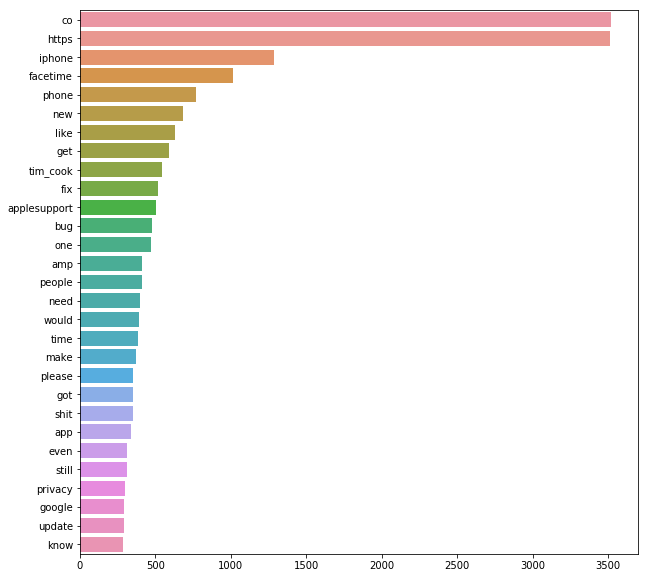

In [50]:
# ignoring top word (which is "apple" in this case) - start at 1 instead of 0
top_words = words_freq[1:30]

for word, freq in top_words:
    print(word, freq)


word = []
count = []

for i, j in top_words: 
    word.append(i)
    count.append(j)


plt.figure(figsize = (10,10))

sns.barplot(x = count, y = word)


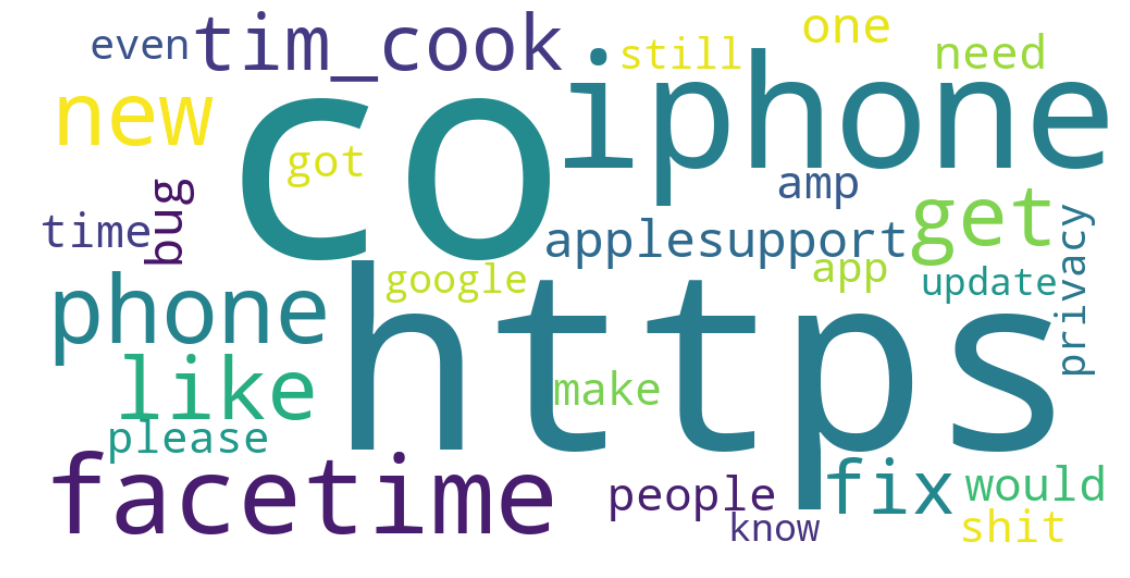

In [51]:
# wordcloud requires a dict with { word : frequency }
words_dict = {}
for k,v in top_words:
    words_dict[k] = int(v)

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate_from_frequencies(words_dict)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [52]:
sentiments = [] ### sentiment score using textblob to create tweets_df with score

for tweet in tweets:
    analysis = TextBlob(tweet)
    sentiments.append(analysis.sentiment.polarity)

tweets_df = pd.DataFrame(tweets)

tweets_df['sentiments'] = sentiments

tweets_df

,text,sentiments
0,’ true apple likely overpriced latest iphones ...,0.190000
1,aaronsuplizio apple yes .,0.000000
2,"mvigod apple said many times , regard multiple...",0.000000
3,’ saying apple ’ problems challenges . . ’ say...,0.000000
4,daveleebbc apple nygovcuomo ; saw go tracked c...,0.000000
5,: apple disabled group facetime https : //t.co...,-0.018615
6,wish tim_cook & amp ; apple tweeted statement ...,0.000000
7,"word time fix , tim_cook & amp ; apple https :...",0.000000
8,"daveleebbc apple nygovcuomo used , back wanted...",0.000000
9,3/ apple biggest welfare taker time $ 120 bill...,0.000000


In [56]:
# find most positive tweets
positive = tweets_df.sort_values(by = 'sentiments', ascending=False)
positive = positive.reset_index(drop=True)

positive



,text,sentiments,sentiment_category
0,technologyjock apple awesome sunder,1.0,Positive
1,whoa apple 's best raidernation ⁦ raiders⁩ htt...,1.0,Positive
2,apple iphone greatest mobile world never give ...,1.0,Positive
3,got file 😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌😌 ’ b...,1.0,Positive
4,"apple billboard banner , perfect timing . face...",1.0,Positive
5,michaelkammes sfcutters apple lacpug hmm . 's ...,1.0,Positive
6,adaniels3po needs partner google/apple maps c-...,1.0,Positive
7,'s awesome photo dwayne tim_cook stregisdc app...,1.0,Positive
8,gauravkheterpal apple help tab ... .. priceles...,1.0,Positive
9,"apple shittiest iphone best offer , nah . 'm `...",1.0,Positive


In [ ]:

# find most negative tweets
negative = tweets_df.sort_values(by='sentiments', ascending=True)
negative = negative.reset_index(drop=True)

negative


In [57]:
tweets_df['sentiment_category'] = np.where(tweets_df['sentiments'] > 0, 'Positive', 
                                          np.where(tweets_df['sentiments'] == 0, 'Neutral', 'Negative'))

In [58]:
#plot sentiment distribution 

import cufflinks as cf
import plotly.graph_objs as go
from plotly.plotly import iplot
cf.go_offline()

tweets_df['sentiments'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    theme = 'pearl',
    colorscale = 'plotly',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')